# Métodos hierárquicos de agrupamento - Tarefa

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [31]:
penguins = sns.load_dataset('penguins').dropna()
penguins_quantitativas = penguins.select_dtypes(include=[np.number])

In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguins_quantitativas)
linked = linkage(scaled_data, method='ward')

In [33]:
# Dividir em 3 grupos
clusters = fcluster(linked, t=3, criterion='maxclust')
penguins_quantitativas['cluster'] = clusters
penguins['cluster'] = clusters

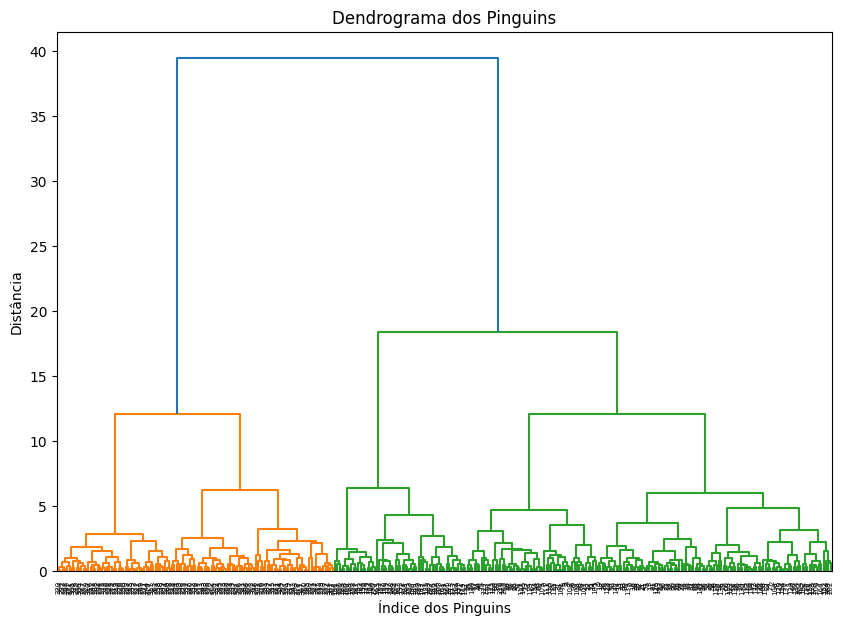

In [34]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Dendrograma dos Pinguins')
plt.xlabel('Índice dos Pinguins')
plt.ylabel('Distância')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [39]:
species_counts = penguins.groupby(['cluster', 'species']).size().unstack(fill_value=0)
species_counts

species,Adelie,Chinstrap,Gentoo
cluster,,,
1,0,0,119
2,0,57,0
3,146,11,0


In [40]:
quantitativa_desc = penguins_quantitativas.groupby('cluster').describe().transpose()
quantitativa_desc

cluster                            1            2            3
bill_length_mm    count   119.000000    57.000000   157.000000
                  mean     47.568067    49.752632    39.191720
                  std       3.106116     2.710107     2.939670
                  min      40.900000    45.200000    32.100000
                  25%      45.350000    47.500000    37.000000
                  50%      47.400000    50.200000    39.100000
                  75%      49.600000    51.300000    41.100000
                  max      59.600000    58.000000    46.900000
bill_depth_mm     count   119.000000    57.000000   157.000000
                  mean     14.996639    18.601754    18.286624
                  std       0.985998     1.072629     1.223755
                  min      13.100000    16.400000    15.500000
                  25%      14.200000    17.800000    17.300000
                  50%      15.000000    18.700000    18.300000
                  75%      15.750000    19.500000    19.000000
                  max      17.300000    20.800000    21.500000
flipper_length_mm count   119.000000    57.000000   157.000000
                  mean    217.235294   197.105263   190.038217
                  std       6.585431     6.526551     6.514171
                  min     203.000000   181.000000   172.000000
                  25%     212.000000   193.000000   186.000000
                  50%     216.000000   197.000000   190.000000
                  75%     221.500000   201.000000   195.000000
                  max     231.000000   212.000000   210.000000
body_mass_g       count   119.000000    57.000000   157.000000
                  mean   5092.436975  3810.087719  3680.095541
                  std     501.476154   338.255096   462.120763
                  min    3950.000000  3250.000000  2700.000000
                  25%    4700.000000  3600.000000  3350.000000
                  50%    5050.000000  3775.000000  3625.000000
                  75%    5500.000000  4000.000000  3975.000000
                  max    6300.000000  4800.000000  4775.000000

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [45]:
penguis = sns.load_dataset('penguins').dropna()
clusters = fcluster(linked, t=5, criterion='maxclust')

penguins['cluster'] = clusters

In [49]:
species_counts = penguins.groupby(['cluster', 'species']).size().unstack(fill_value=0)
species_counts

species,Adelie,Chinstrap,Gentoo
cluster,,,
1,0,0,49
2,0,0,70
3,0,57,0
4,53,3,0
5,93,8,0


In [50]:
species_counts = penguins.groupby(['cluster', 'species', 'sex']).size().unstack(fill_value=0)
species_counts

sex                Female  Male
cluster species                
1       Gentoo         49     0
2       Gentoo          9    61
3       Chinstrap      23    34
4       Adelie          1    52
        Chinstrap       3     0
5       Adelie         72    21
        Chinstrap       8     0

### Percebe-se que os dois últimos clusters possuem pinguis das espécies Adelie e Chinstrap. Porém, enquanto o cluster 4 é majotirariamente composto por penguis machos, o cluster 5 é de maioria de fêmeas. E ambos são de maioria da espécie Adelie
